# Cleaning And Analysis of Employee Exit Surveys

 INTRODUCTION: In this project, I will be working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. I will be answering two basic questions with these datasets which are:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
- Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?


Below is a preview of a couple columns i will work with from the dataset from DETE:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns will work with from the TAFE Dataset:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


From observation, we realize that the DETE dataset has 56 column with some of the columns having missing values. Columns like Torres Strait, South Sea, Disabilities and NESB has almost all of its values missing. Also there are cells that contains "Not Stated" to indicate missing Values.
for TAFE dataset, there are 72 columns.
Each of these datasets contains many columns that will not be used in this analysis and also contains the same column names.

We will be re-reading the DETE dataset so that the Not stated strings will be reperesented as NAN which is the default parameters for missing values in Pandas and we will be droping columns that will not be used for this analysis from both datasets

In [5]:
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")
columns_to_drop = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(columns_to_drop, axis = 1)
column_to_drop = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(column_to_drop, axis = 1)
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

The next thing we are going to do in the cleaning of our data is to edit our column names so that they are easily readable and can be easily merged together. We will first be making all our column name be in Upper case for easy assessment, we will replace all spaces with underscores (_) and we will clean all whitespaces for each column names. We will also edit the names of column that are similar in both dataset to match the same names/. e.g Record ID as ID

In [6]:
mapping = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
def column_edit(column):
    column = column.str.strip().str.replace(" ","_").str.replace(".","").str.upper()
    return column 
dete_survey_updated.columns = column_edit(dete_survey_updated.columns)
dete_survey_updated.columns
tafe_survey_updated = tafe_survey_updated.rename(columns = mapping)
tafe_survey_updated.columns = column_edit(tafe_survey_updated.columns)

In [7]:
dete_survey_updated.head()
tafe_survey_updated.head()

,ID,INSTITUTE,WORKAREA,CEASE_DATE,SEPARATIONTYPE,CONTRIBUTING_FACTORS_CAREER_MOVE_-_PUBLIC_SECTOR,CONTRIBUTING_FACTORS_CAREER_MOVE_-_PRIVATE_SECTOR,CONTRIBUTING_FACTORS_CAREER_MOVE_-_SELF-EMPLOYMENT,CONTRIBUTING_FACTORS_ILL_HEALTH,CONTRIBUTING_FACTORS_MATERNITY/FAMILY,...,CONTRIBUTING_FACTORS_STUDY,CONTRIBUTING_FACTORS_TRAVEL,CONTRIBUTING_FACTORS_OTHER,CONTRIBUTING_FACTORS_NONE,GENDER,AGE,EMPLOYMENT_STATUS,POSITION,INSTITUTE_SERVICE,ROLE_SERVICE
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Because our analysis will be based on people that left the job by resigning since our edn goal is to see if employee resigined due to dissatistafction. That means the sepereation type that wil be used will only be that of resignation. We will be dropping all datas which seperation type is different from resignation

In [8]:
dete_survey_updated["SEPARATIONTYPE"].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SEPARATIONTYPE, dtype: int64

In [9]:
tafe_survey_updated["SEPARATIONTYPE"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: SEPARATIONTYPE, dtype: int64

In [10]:
dete_resignations= (dete_survey_updated[dete_survey_updated["SEPARATIONTYPE"].str.contains(r"Resignation")])
dete_resignations = dete_resignations.copy()
dete_resignations["SEPARATIONTYPE"].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: SEPARATIONTYPE, dtype: int64

In [11]:
tafe_survey_updated = tafe_survey_updated[tafe_survey_updated['SEPARATIONTYPE'].notnull()]
tafe_resignations = tafe_survey_updated[tafe_survey_updated["SEPARATIONTYPE"].str.contains(r"Resignation")]
tafe_resignations = tafe_resignations.copy()
tafe_resignations["SEPARATIONTYPE"].value_counts()

Resignation    340
Name: SEPARATIONTYPE, dtype: int64

Going ahead, we want to make sure that we do not have inconsistancies in the datsets,. we will be checking our datas to see that they are reasonable enough to be analyzed. One major example is the dates which can be found in CEASE_DATE for dates when employees stoped working and DETE_START_DATE when Employee started working. These dates are not suppose to be in the future and are woulld not have to be later than 1940.

In [12]:
dete_resignations["CEASE_DATE"].value_counts().sort_values()

09/2010      1
07/2012      1
2010         1
07/2006      1
05/2012      2
05/2013      2
08/2013      4
10/2013      6
11/2013      9
07/2013      9
09/2013     11
06/2013     14
12/2013     17
01/2014     22
2013        74
2012       126
Name: CEASE_DATE, dtype: int64

In [13]:
dete_resignations["CEASE_DATE"] = dete_resignations["CEASE_DATE"].str.split("/")
dete_resignations["CEASE_DATE"] = dete_resignations["CEASE_DATE"].str[-1].astype(float)
dete_resignations["CEASE_DATE"].value_counts().sort_values()

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: CEASE_DATE, dtype: int64

In [14]:
dete_resignations["DETE_START_DATE"].value_counts(dropna = False).sort_index()

 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: DETE_START_DATE, dtype: int64

In [15]:
tafe_resignations["CEASE_DATE"].value_counts(dropna = False).sort_index()

 2009.0      2
 2010.0     68
 2011.0    116
 2012.0     94
 2013.0     55
NaN          5
Name: CEASE_DATE, dtype: int64

Seen above, we realize that the dates are now consistent and only include the years and not the day and the month. 

Since our analysis is to answer a question which involve the year of service that each employees have used in working, we will be including a column of the number of years each eemployees worked for. This column has already titled INSTITUTE_SERVICE been included in the Tafe dataset. We will create a new one as INSTITUTE_SERVICE in the DETE dataset and explore the column in the TAFE dataset

In [16]:
dete_resignations["INSTITUTE_SERVICE"] = dete_resignations["CEASE_DATE"] - dete_resignations["DETE_START_DATE"]

# Identifying employees that are dissatisfied in the datasets
To Identify, we have to figure out the column that describes why employees left their jobs in both datasets.
    1. In the TAFE Dataset:
        - Contributing Factors. Dissatisfaction
        - Contributing Factors. Job Dissatisfaction
    2. In the DETE Dataset:
        - job_dissatisfaction
        - dissatisfaction_with_the_department
        - physical_work_environment
        - lack_of_recognition
        - lack_of_job_security
        - work_location
        - employment_conditions
        - work_life_balance
        - workload


In [17]:
tafe_resignations["CONTRIBUTING_FACTORS_DISSATISFACTION"].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: CONTRIBUTING_FACTORS_DISSATISFACTION, dtype: int64

In [18]:
tafe_resignations["CONTRIBUTING_FACTORS_JOB_DISSATISFACTION"].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: CONTRIBUTING_FACTORS_JOB_DISSATISFACTION, dtype: int64

In [19]:
def check_val(val):
    if val == "-":
        return False
    if pd.isnull(val):
        return np.nan
    else:
        return True
tafe_resignations[["CONTRIBUTING_FACTORS_JOB_DISSATISFACTION","CONTRIBUTING_FACTORS_DISSATISFACTION" ]] = tafe_resignations[["CONTRIBUTING_FACTORS_JOB_DISSATISFACTION","CONTRIBUTING_FACTORS_DISSATISFACTION" ]].applymap(check_val)
    

In [20]:
dissatisfied_tafe = tafe_resignations[["CONTRIBUTING_FACTORS_JOB_DISSATISFACTION","CONTRIBUTING_FACTORS_DISSATISFACTION" ]]
tafe_resignations["DISSATISFIED"] = dissatisfied_tafe.any(axis = 1, skipna = False)

For the DETE DataSet, the job dissatisfaction conditions has already been set to either True or False. We will be creating a dissatisfied Column for when any of the condition is True.

In [21]:
dete_resignations.columns

Index(['ID', 'SEPARATIONTYPE', 'CEASE_DATE', 'DETE_START_DATE',
       'ROLE_START_DATE', 'POSITION', 'CLASSIFICATION', 'REGION',
       'BUSINESS_UNIT', 'EMPLOYMENT_STATUS', 'CAREER_MOVE_TO_PUBLIC_SECTOR',
       'CAREER_MOVE_TO_PRIVATE_SECTOR', 'INTERPERSONAL_CONFLICTS',
       'JOB_DISSATISFACTION', 'DISSATISFACTION_WITH_THE_DEPARTMENT',
       'PHYSICAL_WORK_ENVIRONMENT', 'LACK_OF_RECOGNITION',
       'LACK_OF_JOB_SECURITY', 'WORK_LOCATION', 'EMPLOYMENT_CONDITIONS',
       'MATERNITY/FAMILY', 'RELOCATION', 'STUDY/TRAVEL', 'ILL_HEALTH',
       'TRAUMATIC_INCIDENT', 'WORK_LIFE_BALANCE', 'WORKLOAD',
       'NONE_OF_THE_ABOVE', 'GENDER', 'AGE', 'ABORIGINAL', 'TORRES_STRAIT',
       'SOUTH_SEA', 'DISABILITY', 'NESB', 'INSTITUTE_SERVICE'],
      dtype='object')

In [22]:
dissatisfied_dete = dete_resignations[["JOB_DISSATISFACTION","DISSATISFACTION_WITH_THE_DEPARTMENT",'PHYSICAL_WORK_ENVIRONMENT','LACK_OF_RECOGNITION','LACK_OF_JOB_SECURITY','WORK_LOCATION','EMPLOYMENT_CONDITIONS','WORK_LIFE_BALANCE', 'WORKLOAD']]
dete_resignations["DISSATISFIED"] = dissatisfied_dete.any(axis = 1, skipna = False)

# Combining the DATASETs
Now that we have cleaned the both Datasets, we will be combining the datas so that we canb now analyze them together.

In [23]:
dete_resignations_copy = dete_resignations.copy()
tafe_resignations_copy = tafe_resignations.copy()


In [24]:
dete_resignations_copy["INSTITUTE"] = "DETE"
tafe_resignations_copy["INSTITUTE"] = "TAFE"

In [25]:
combined = pd.merge(left = dete_resignations_copy, right = tafe_resignations_copy , how = "outer")

We will be dropping columns that are not relevant for our analyzes. Which are columns that does not have values in both datasets after we have combined them. 

In [26]:
combined_updated = combined.dropna(thresh = 500, axis = 1)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 10 columns):
ID                   651 non-null float64
SEPARATIONTYPE       651 non-null object
CEASE_DATE           635 non-null float64
POSITION             598 non-null object
EMPLOYMENT_STATUS    597 non-null object
GENDER               592 non-null object
AGE                  596 non-null object
INSTITUTE_SERVICE    563 non-null object
DISSATISFIED         643 non-null object
INSTITUTE            651 non-null object
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


# Analyzing our Data After Cleaning
First we will categorize the employees by the number of years that they worked for before resignations. These information can be found in the INSTITUTE_SERVICE Column. These category will follow the format below:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company


In [27]:
combined_updated["INSTITUTE_SERVICE"].value_counts().sort_values()

34.0                   1
27.0                   1
29.0                   1
33.0                   1
35.0                   1
49.0                   1
31.0                   1
41.0                   1
42.0                   1
38.0                   1
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
39.0                   3
21.0                   3
19.0                   3
32.0                   3
23.0                   4
24.0                   4
11.0                   4
18.0                   5
16.0                   5
22.0                   6
14.0                   6
12.0                   6
10.0                   6
17.0                   6
15.0                   7
20.0                   7
13.0                   8
8.0                    8
More than 20 years    10
7.0                   13
9.0                   14
2.0                   14
4.0                   16
6.0                   17
3.0                   20


In [28]:
with pd.option_context('mode.chained_assignment', None):
    value = (combined_updated.loc[:,'INSTITUTE_SERVICE'].astype('str').str.extract(r'(\d+)', expand = False).astype('float'))
    combined_updated.loc[:,'INSTITUTE_SERVICE'] = value


# Check the years extracted are correct
    combined_updated.loc[:,'INSTITUTE_SERVICE'].value_counts()


In [29]:
combined_updated['INSTITUTE_SERVICE'].value_counts(dropna = False)

 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: INSTITUTE_SERVICE, dtype: int64

In [30]:
with pd.option_context('mode.chained_assignment', None): #Avoiding Chained Assignement 
    def category(val):                                   #Categorizng the 
        if pd.isnull(val):
            return np.nan
        if val < 3:
            return "New"
        if 3 <= val <= 6:
            return "Experienced"
        if 7 <= val <= 10:
            return "Established"
        if val >= 11:
            return "Veteran"
    combined_updated["SERVICE_CAT"] = combined_updated["INSTITUTE_SERVICE"].apply(category).copy()


In [31]:
combined_updated["DISSATISFIED"].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: DISSATISFIED, dtype: int64

There are a total of 240 who resigned due to disatisfaction and 403 who resigned not due to dissatisfaction. Because people who resineged not due to dissatisfaction are more than people who resigned becasue they were dissatisfied, we will fill the missing values with the parameter that occur most.

In [32]:
combined_updated = combined_updated.fillna(value = {"DISSATISFIED" : False})

In [33]:
combined_updated["DISSATISFIED"].value_counts(dropna = False)

False    411
True     240
Name: DISSATISFIED, dtype: int64

# Grouping and Plotting the DIssatisfied Employee by percentage according to the Service Categories

In [34]:
combined_plot = combined_updated.pivot_table(index = "SERVICE_CAT", values = ["DISSATISFIED"])
combined_plot

,DISSATISFIED
SERVICE_CAT,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


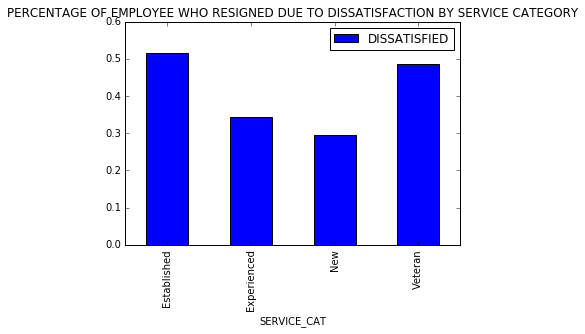

In [35]:
%matplotlib inline
combined_plot.plot(kind = 'bar', title = "PERCENTAGE OF EMPLOYEE WHO RESIGNED DUE TO DISSATISFACTION BY SERVICE CATEGORY")

The Chart above explains and answers the first question in our Analysis. About 30% of new Employees resigned due to dissatisfaction. While close to 35% of workers who have spent between 3 - 6 years resigned due to a kind of dissatisfaction. 50 percent of Estanblished workers who have spent betwwen 7 - 10 years resigned due to a kind of dissatisfaction and for Veteran who have worked for over 11 years, about 50% of them resigned due to some kind of dissatisfaction.

# Analyzing by Age of Employees

In [36]:
combined_updated["AGE"].value_counts(dropna = False).sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
NaN              55
Name: AGE, dtype: int64

Since we have ages of Emplopyees between 20 to 60, we will be categorizing them as below:
- below 20 : 20 or Younger
- 21 - 30  : 21 to 30
- 31 - 40 : 31 to 40
- 41 - 50 : 41 to 50
- 51 - 60 : 51 to 60
- 61 and above:  61 and above  

In [37]:
combined_updated["AGE"] = combined_updated["AGE"].astype("str").str.extract(r"(\d+)", expand = False).astype(float)

In [38]:
combined_updated["AGE"].value_counts(dropna = False)

 41.0    93
 46.0    81
 36.0    73
 51.0    71
 26.0    67
 21.0    62
 31.0    61
NaN      55
 56.0    55
 61.0    23
 20.0    10
Name: AGE, dtype: int64

In [39]:
def age_category(val):
    if pd.isnull(val):
        return np.nan
    if val <= 20:
        return "20 or Younger"
    if 21 <= val <=30:
        return "21 to 30"
    if 31 <= val <=40:
        return "31 to 40"
    if 41 <= val <= 50:
        return "41 to 50"
    if 51 <= val <= 60:
        return "51 to 60"
    if val >= 61:
        return "61 and Above"
combined_updated["AGE_CATEGORY"] = combined_updated["AGE"].apply(age_category)

In [40]:
combined_updated["AGE_CATEGORY"].value_counts()

41 to 50         174
31 to 40         134
21 to 30         129
51 to 60         126
61 and Above      23
20 or Younger     10
Name: AGE_CATEGORY, dtype: int64

In [41]:
combined_age_plot = combined_updated.pivot_table(index = "AGE_CATEGORY", values = "DISSATISFIED")
combined_age_plot

,DISSATISFIED
AGE_CATEGORY,
20 or Younger,0.200000
21 to 30,0.364341
31 to 40,0.358209
41 to 50,0.379310
51 to 60,0.404762
61 and Above,0.521739


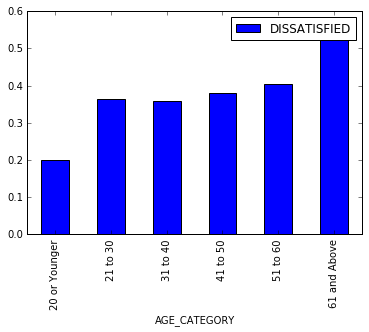

In [42]:
combined_age_plot.plot(kind = 'bar')

# To answer secod the question in our analysis:
- About 20% of Employees of Age 20 and younger resigned due to some kind of Dissatisfaction
- About 35% of Employees between the age of 21 and 30 resigned due to some kind of Dissatisfaction
- About 35% of Employees between the age of 31 and 40 resigned due to some kind of Dissatisfaction
- About 38% of Employees between the age of 41 and 50 resigned due to some kind of Dissatisfaction
- About 40% of Employees between the age of 51 and 60 resigned due to some kind of Dissatisfaction
- Over 50% of Employees between the age of 31 and 40 resigned due to some kind of Dissatisfaction

# ANALYZING THIRD QUESTION
Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?


In [43]:
dete_resignations_copy.head()


,ID,SEPARATIONTYPE,CEASE_DATE,DETE_START_DATE,ROLE_START_DATE,POSITION,CLASSIFICATION,REGION,BUSINESS_UNIT,EMPLOYMENT_STATUS,...,GENDER,AGE,ABORIGINAL,TORRES_STRAIT,SOUTH_SEA,DISABILITY,NESB,INSTITUTE_SERVICE,DISSATISFIED,INSTITUTE
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False,DETE


In [44]:
tafe_resignations_copy.head()

,ID,INSTITUTE,WORKAREA,CEASE_DATE,SEPARATIONTYPE,CONTRIBUTING_FACTORS_CAREER_MOVE_-_PUBLIC_SECTOR,CONTRIBUTING_FACTORS_CAREER_MOVE_-_PRIVATE_SECTOR,CONTRIBUTING_FACTORS_CAREER_MOVE_-_SELF-EMPLOYMENT,CONTRIBUTING_FACTORS_ILL_HEALTH,CONTRIBUTING_FACTORS_MATERNITY/FAMILY,...,CONTRIBUTING_FACTORS_TRAVEL,CONTRIBUTING_FACTORS_OTHER,CONTRIBUTING_FACTORS_NONE,GENDER,AGE,EMPLOYMENT_STATUS,POSITION,INSTITUTE_SERVICE,ROLE_SERVICE,DISSATISFIED
3,6.341399e+17,TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [45]:
def count(val):
    if val == True:
        return "Dissatisfied"
    else:
        return "Others"
dete_resignations_copy["RESIGNATION"]= dete_resignations_copy['DISSATISFIED'].apply(count)

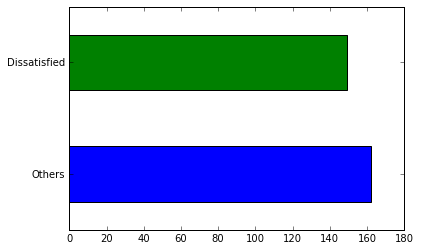

In [46]:
dete_resignations_copy["RESIGNATION"].value_counts().plot(kind= 'barh')

On the DETE Dataset, there are there are about 150 Employees who resigned because they are dissatisfied in some kind of way while there are about 160 Employee who resigned because of some other reasons

In [47]:
tafe_resignations_copy["RESIGNATION"]= tafe_resignations_copy['DISSATISFIED'].apply(count)

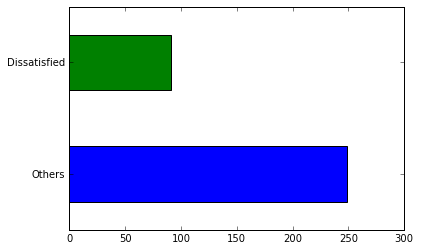

In [48]:
tafe_resignations_copy["RESIGNATION"].value_counts().plot(kind= 'barh', xlim = (0, 300))

On the TAFE Dataset, there are there are about 100 Employees who resigned because they are dissatisfied in some kind of way while there are about 250 Employees who resigned because of some other reasons